<a href="https://colab.research.google.com/github/nhjung-phd/TimeSeriesAnalysis/blob/main/notebooks/21_ann_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN(MLP) 기반  예측

# ✅ 🚀 ANN(MLP) 기반 테슬라 주가 예측 코드:

/tmp/ipython-input-1926965697.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.1723 - val_loss: 0.0395
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0866 - val_loss: 0.0095
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0580 - val_loss: 0.0038
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0472 - val_loss: 0.0090
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0337 - val_loss: 0.0159
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0277 - val_loss: 0.0336
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0229 - val_loss: 0.0513
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0247 - val_loss: 0.0377
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - val_loss: 0.0388
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0241 - val_loss: 0.0471
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0221 - val_loss: 0.0348
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.

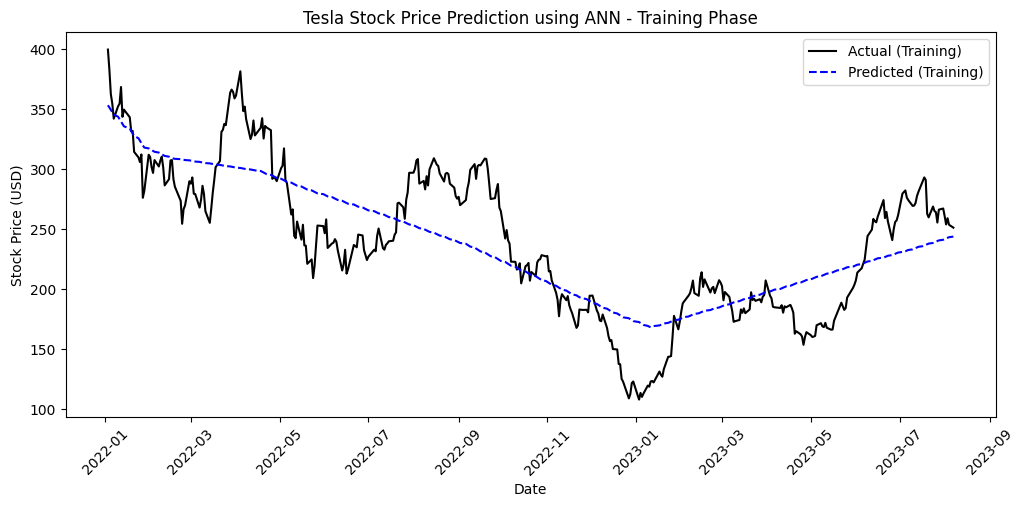

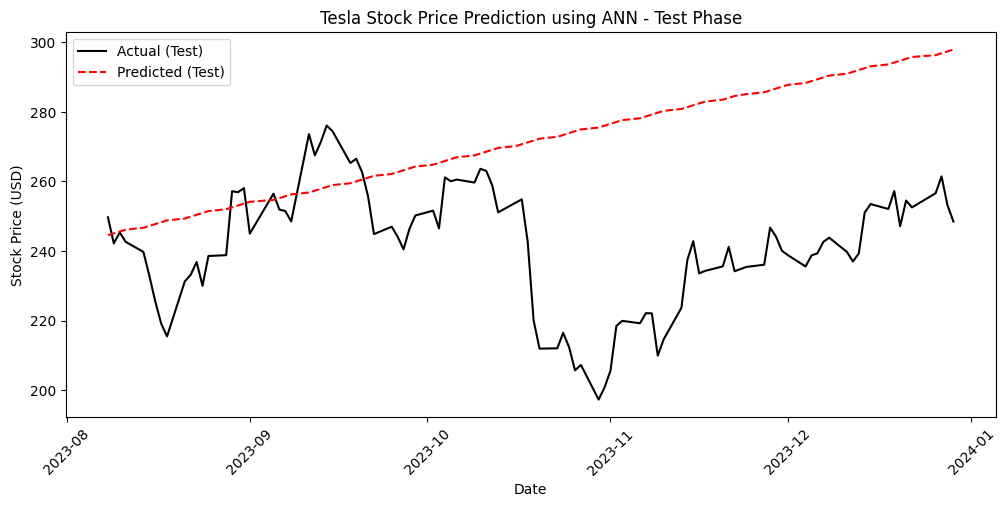

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")

# 데이터프레임 변환
df = df.reset_index()

# 📌 2️⃣ Feature 생성: 날짜를 숫자로 변환
df["Day"] = np.arange(len(df))

# 📌 3️⃣ 입력 변수(X) 및 출력 변수(y) 정의
X = df[["Day"]].values  # 날짜를 입력 변수로 사용
y = df["Close"].values  # 종가(Close)를 예측할 목표 변수로 사용

# 데이터 정규화 (MinMaxScaler 사용)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# 📌 4️⃣ 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, shuffle=False)

# 📌 5️⃣ ANN(MLP) 모델 생성
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # 첫 번째 은닉층
    Dense(32, activation='relu'),  # 두 번째 은닉층
    Dense(1)  # 출력층 (주가 예측)
])

# 모델 컴파일 (손실함수: MSE, 최적화 알고리즘: Adam)
model.compile(optimizer='adam', loss='mse')

# 📌 6️⃣ 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 7️⃣ 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 예측 데이터 역정규화
y_train_pred = scaler_y.inverse_transform(y_train_pred)
y_test_pred = scaler_y.inverse_transform(y_test_pred)
y_train_actual = scaler_y.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# 📌 8️⃣ 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 9️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[:len(X_train)], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[:len(X_train)], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 🔟 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[len(X_train):], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[len(X_train):], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ 🚀 Sliding Window 적용된 ANN(MLP) 기반 테슬라 주가 예측 코드:

/tmp/ipython-input-2884102795.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed

Epoch 1/100



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2293 - val_loss: 0.0050
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - val_loss: 0.0013
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - val_loss: 0.0012
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - val_loss: 9.1516e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - val_loss: 8.3993e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - val_loss: 9.4934e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - val_loss: 8.5397e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0011 - val_loss: 9.2656e-04
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 9.7552e-04
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015 - val_loss: 7.4850e-04
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms

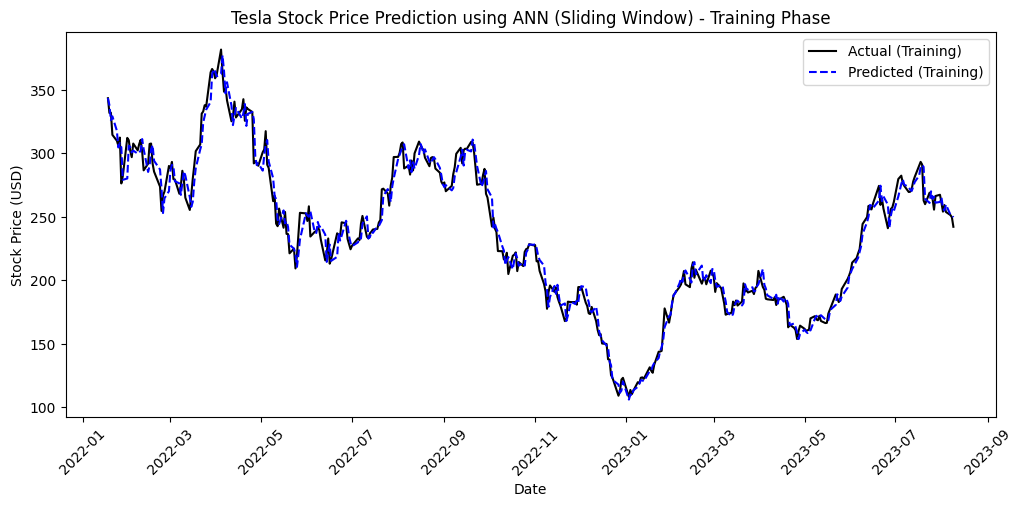

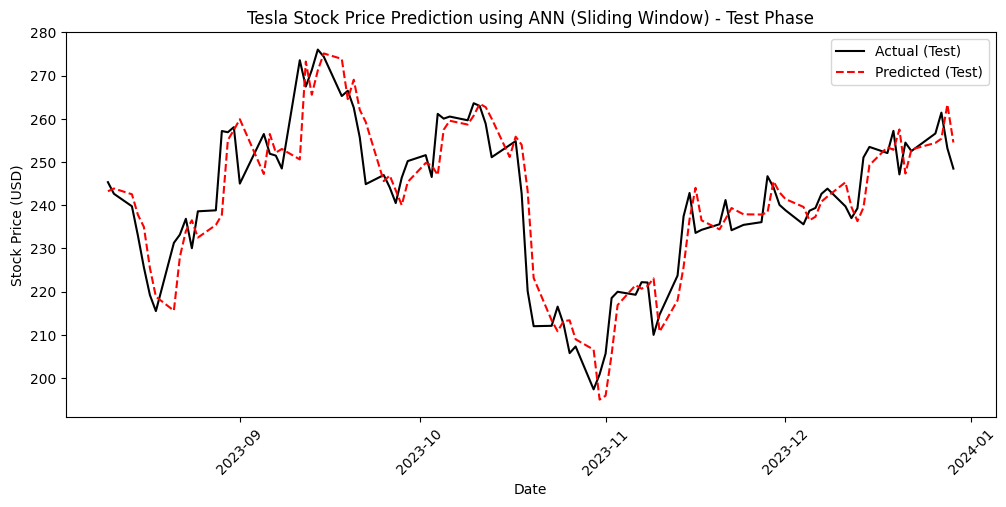

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ 입력 변수(X) 및 출력 변수(y) 생성 (슬라이딩 윈도우)
window_size = 10  # 과거 10일치 데이터를 입력으로 사용

def create_sliding_window_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])  # window_size 만큼의 과거 데이터
        y.append(data[i + window_size])  # 다음날 주가 (타겟)
    return np.array(X), np.array(y)

# `Close`(종가) 데이터를 정규화
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# Sliding Window 적용
X, y = create_sliding_window_data(scaled_close, window_size)

# 📌 3️⃣ 데이터 분할 (80% 학습, 20% 테스트)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 📌 4️⃣ ANN(MLP) 모델 생성
model = Sequential([
    Dense(64, activation='relu', input_shape=(window_size,)),  # 첫 번째 은닉층
    Dense(32, activation='relu'),  # 두 번째 은닉층
    Dense(1)  # 출력층 (주가 예측)
])

# 모델 컴파일 (손실함수: MSE, 최적화 알고리즘: Adam)
model.compile(optimizer='adam', loss='mse')

# 📌 5️⃣ 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 6️⃣ 예측 수행
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# 예측 데이터 역정규화
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📌 7️⃣ 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 8️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN (Sliding Window) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 9️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN (Sliding Window) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()


# ✅ 🚀 하이퍼파라미터 튜닝이 적용된 ANN 기반 테슬라 주가 예측 코드

✔ KerasTuner를 활용하여 최적의 모델 자동 탐색
✔ 튜닝할 하이퍼파라미터 목록

은닉층(hidden layers) 개수
각 은닉층의 뉴런 수
학습률(learning rate)
✔ 최적의 하이퍼파라미터를 찾아 훈련 진행

In [3]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 9.7 MB/s eta 0:00:00


Trial 10 Complete [00h 00m 11s]
val_loss: 0.000621314684394747

Best val_loss So Far: 0.000621314684394747
Total elapsed time: 00h 02m 12s
📌 최적의 하이퍼파라미터: {'units_1': 192, 'num_hidden_layers': 2, 'units_2': 64, 'learning_rate': 0.001, 'units_3': 96, 'units_4': 192}
Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0730 - val_loss: 0.0024
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0044 - val_loss: 0.0014
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - val_loss: 0.0015
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 9.3318e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0018 - val_loss: 8.9149e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

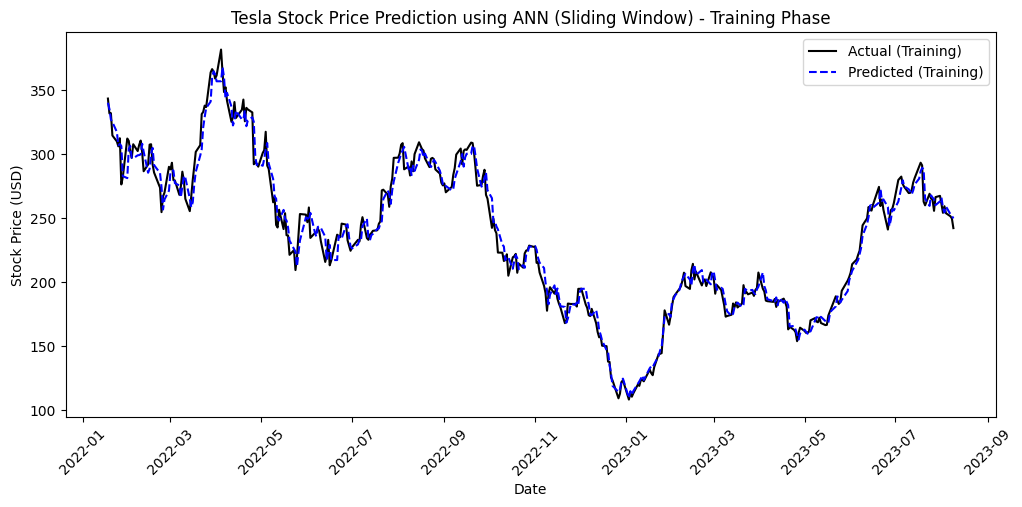

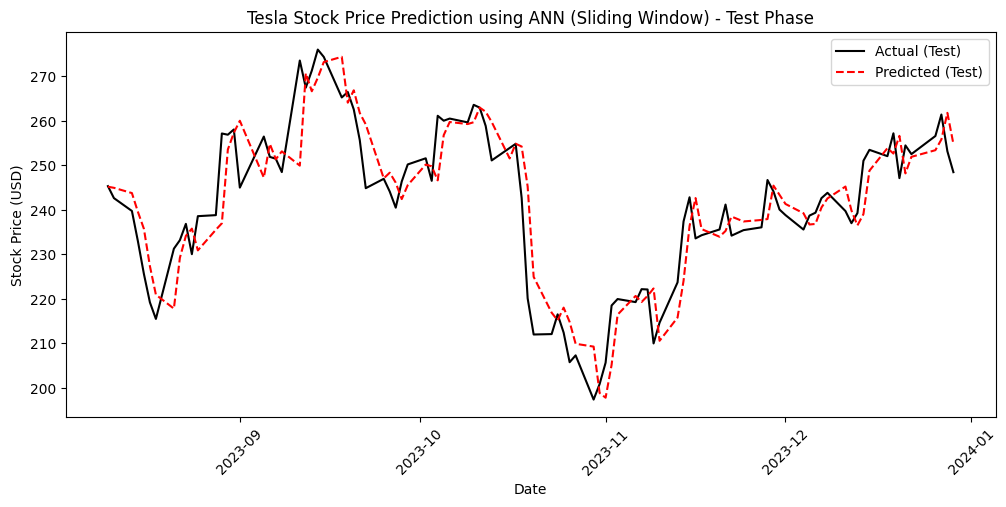

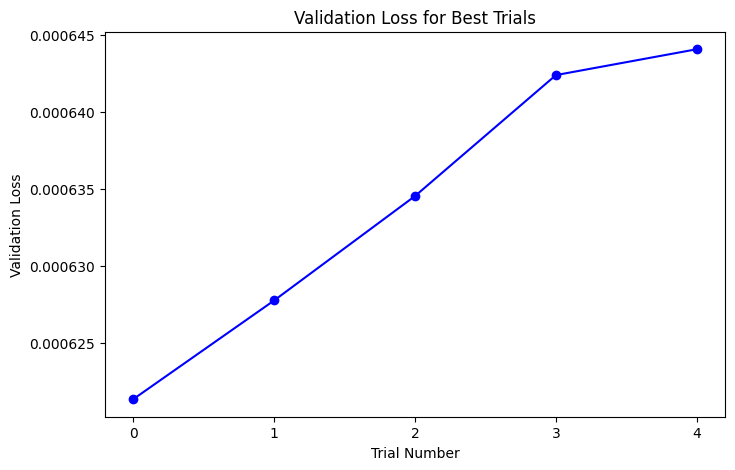

In [4]:

import os
import shutil
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt  # KerasTuner 추가
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ✅ 📌 기존 하이퍼파라미터 튜닝 파일 강제 삭제 (새로운 탐색을 위해)
tuner_dir = "hyperparameter_tuning/Tesla_ANN_Tuning"
shutil.rmtree(tuner_dir, ignore_errors=True)


# 📌 1️⃣ 테슬라(TSLA) 주가 데이터 다운로드 (최근 2년치)
df = yf.download("TSLA", start="2022-01-01", end="2024-01-01")
df = df.reset_index()

# 📌 2️⃣ 입력 변수(X) 및 출력 변수(y) 생성 (슬라이딩 윈도우)
window_size = 10  # 과거 10일치 데이터를 입력으로 사용

def create_sliding_window_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i : i + window_size])  # window_size 만큼의 과거 데이터
        y.append(data[i + window_size])  # 다음날 주가 (타겟)
    return np.array(X), np.array(y)

# `Close`(종가) 데이터를 정규화
scaler = MinMaxScaler()
scaled_close = scaler.fit_transform(df["Close"].values.reshape(-1, 1))

# Sliding Window 적용
X, y = create_sliding_window_data(scaled_close, window_size)

# 📌 3️⃣ 데이터 분할 (80% 학습, 20% 테스트)
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# 📌 4️⃣ 하이퍼파라미터 튜닝을 위한 모델 정의
def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units_1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(window_size,)))

    # 은닉층 개수 추가 (1~3개 범위에서 최적값 탐색)
    for i in range(hp.Int('num_hidden_layers', 1, 3)):
        model.add(Dense(hp.Int(f'units_{i+2}', min_value=32, max_value=256, step=32), activation='relu'))

    model.add(Dense(1))  # 출력층

    # 학습률 최적화
    model.compile(
        optimizer=Adam(hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='mse'
    )

    return model

# 📌 5️⃣ KerasTuner를 사용한 하이퍼파라미터 튜닝
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # 시도할 모델 개수
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='Tesla_ANN_Tuning'
)

# 📌 6️⃣ 최적의 하이퍼파라미터 찾기
tuner.search(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 7️⃣ 최적 모델 선택
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"📌 최적의 하이퍼파라미터: {best_hps.values}")

best_model = tuner.hypermodel.build(best_hps)

# 📌 8️⃣ 최적 모델 학습
history = best_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# 📌 9️⃣ 예측 수행
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# 예측 데이터 역정규화
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 📌 🔟 성능 평가
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)
train_r2 = r2_score(y_train_actual, y_train_pred)
test_r2 = r2_score(y_test_actual, y_test_pred)

print(f"📌 Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"📌 Test MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# 📌 1️⃣1️⃣ 결과 시각화 (훈련 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_actual, label="Actual (Training)", color="black")
plt.plot(df["Date"].iloc[window_size:split_index+window_size], y_train_pred, label="Predicted (Training)", color="blue", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN (Sliding Window) - Training Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 1️⃣2️⃣ 결과 시각화 (테스트 데이터 예측 vs 실제값)
plt.figure(figsize=(12, 5))
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_actual, label="Actual (Test)", color="black")
plt.plot(df["Date"].iloc[split_index+window_size:], y_test_pred, label="Predicted (Test)", color="red", linestyle="--")
plt.title("Tesla Stock Price Prediction using ANN (Sliding Window) - Test Phase")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 📌 1️⃣3️⃣ 최적 하이퍼파라미터 시각화
best_trials = tuner.oracle.get_best_trials(num_trials=5)
trial_numbers = range(len(best_trials))
val_losses = [trial.metrics.get_best_value('val_loss') for trial in best_trials]

plt.figure(figsize=(8, 5))
plt.plot(trial_numbers, val_losses, marker='o', linestyle='-', color="blue")
plt.xlabel("Trial Number")
plt.ylabel("Validation Loss")
plt.title("Validation Loss for Best Trials")
plt.xticks(trial_numbers)
plt.show()


[INFO] model=mlp, samples=491, test_size=60, rolling_window=120


,MAE,RMSE,MAPE(%),R2
Full-Series (IS all),0.0658,0.0826,2.548986e+10,0.7933
Full-Series (IS test),0.0396,0.0501,9.679100e+00,0.3201
Fixed-Origin,0.0719,0.0914,1.859200e+01,-1.2674
Rolling,0.0804,0.0902,1.843770e+01,-1.2047
Expanding,0.0608,0.0775,1.522010e+01,-0.6287


,y_true,full_series(IS),fixed_origin,rolling,expanding
Date,,,,,
2023-09-21,0.520686,0.457412,0.507212,0.438328,0.507212
2023-09-22,0.522331,0.456109,0.507493,0.441841,0.480556
2023-09-25,0.519384,0.452199,0.508336,0.484249,0.481068
2023-09-26,0.532919,0.450895,0.508611,0.512957,0.502738
2023-09-27,0.530760,0.449592,0.508657,0.511559,0.488151


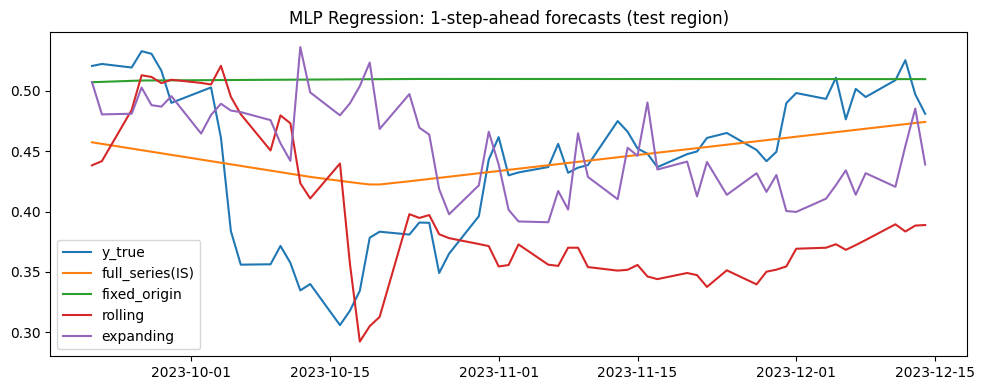

In [9]:
# ===============================================================
# ANN/Linear 시계열 예측 - 4 스킴 올인원 셀 (x축=날짜)
#   1) Full-series (내표본)
#   2) Fixed-origin (정적 파라미터, 1-스텝 OOS)
#   3) Rolling window (리핏, 1-스텝 OOS)
#   4) Expanding window (리핏, 1-스텝 OOS)
#
# 변경점(에러 해결):
#  - df에 중복 컬럼명/묶음 선택(df['Close']가 DataFrame)일 때도 안전하게 첫 컬럼을 선택
#  - y 컬럼 위치를 찾기 위해 list(df.columns).index(...)를 쓰지 않고, "이름 배제" 로직으로 대체
#  - X/y 길이·인덱스 자동 정렬, 결측 제거
#  - sklearn 구버전 RMSE 안전 처리
#  - 플롯 x축 날짜 보장(DATE_COL 또는 DatetimeIndex)
# ===============================================================
from typing import Optional, Tuple, Dict, List
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

# --------------------------
# ★ 필요 시 여기만 수정 ★
# --------------------------
MODEL           = "mlp"         # "mlp" 또는 "linear"
TEST_SIZE       = 60            # 테스트(평가) 구간 길이
ROLLING_WINDOW  = None          # None이면 자동(min(120, 학습길이)). 예: 120
FIT_INTERCEPT   = True          # 선형회귀용 옵션(MLP에는 무의미)
DATE_COL: Optional[str] = "Date"   # df에 날짜 컬럼명이 있다면 지정(없으면 None)

# df에서 명시적으로 타깃/설명 컬럼 지정 (미지정 시 자동 감지)
Y_COL:    Optional[str]       = None       # 예: "Close"
X_COLS:   Optional[List[str]] = None       # 예: ["Day"] 또는 ["x1","x2"]; None이면 자동 감지

# MLP(ANN) 기본 하이퍼파라미터(원하면 조정)
MLP_PARAMS = dict(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    random_state=42,
    max_iter=500,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.1
)

# ------------------------------------------------------------
# 도우미: 지표, 모델, 설계행렬 구성, 자동 감지
# ------------------------------------------------------------
def _safe_rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    try:
        return mean_squared_error(y_true, y_pred, squared=False)  # 신버전
    except TypeError:
        return float(np.sqrt(mean_squared_error(y_true, y_pred))) # 구버전

def _metrics(y_true: np.ndarray, y_pred: np.ndarray) -> Dict[str, float]:
    eps = 1e-12
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": _safe_rmse(y_true, y_pred),
        "MAPE(%)": float(np.mean(np.abs((y_true - y_pred) / np.where(np.abs(y_true)<eps, eps, y_true))) * 100.0),
        "R2": r2_score(y_true, y_pred),
    }

def _ensure_2d(X) -> pd.DataFrame:
    if isinstance(X, pd.DataFrame):
        return X
    if isinstance(X, pd.Series):
        return X.to_frame(name=getattr(X, "name", "x"))
    X = np.asarray(X)
    if X.ndim == 1:
        X = X.reshape(-1, 1)
    return pd.DataFrame(X, columns=[f"x{i}" for i in range(X.shape[1])])

def _as_series(obj, name="y") -> pd.Series:
    if isinstance(obj, pd.Series):
        return pd.to_numeric(obj, errors="coerce").rename(name)
    if isinstance(obj, pd.DataFrame):
        # 단일/중복 컬럼 모두 첫 컬럼만 사용
        return pd.to_numeric(obj.iloc[:, 0], errors="coerce").rename(name)
    arr = np.asarray(obj).reshape(-1)
    return pd.Series(arr, name=name)

def _get_series_from_col(df: pd.DataFrame, colname: str) -> pd.Series:
    """중복 컬럼명일 때 df[colname]이 DataFrame이 되므로 첫 컬럼을 안전 선택"""
    obj = df[colname]
    if isinstance(obj, pd.DataFrame):
        return pd.to_numeric(obj.iloc[:, 0], errors="coerce")
    return pd.to_numeric(obj, errors="coerce")

def _auto_pick_from_df(df: pd.DataFrame,
                       y_col: Optional[str],
                       x_cols: Optional[List[str]],
                       date_col: Optional[str]):
    """df에서 y / X(여러 컬럼 가능) / 날짜 자동 선택 (중복 컬럼명 안전)"""
    # --- 날짜 인덱스 추출 ---
    idx = df.index
    date_idx = None
    if isinstance(idx, pd.DatetimeIndex):
        date_idx = idx
    elif date_col and date_col in df.columns:
        try:
            date_idx = pd.to_datetime(_get_series_from_col(df, date_col), errors="coerce")
        except Exception:
            date_idx = None

    # --- y 선택 ---
    y_label_raw = None
    if y_col and y_col in df.columns:
        y_series = _get_series_from_col(df, y_col).rename("y")
        y_label_raw = y_col
    else:
        y_series = None
        for c in ["y","Y","target","Target","Close","close","value","Value"]:
            if c in df.columns:
                y_series = _get_series_from_col(df, c).rename("y")
                y_label_raw = c
                break
        if y_series is None:
            # 첫 숫자 컬럼
            for c in df.columns:
                if pd.api.types.is_numeric_dtype(_get_series_from_col(df, c)):
                    y_series = _get_series_from_col(df, c).rename("y")
                    y_label_raw = c
                    break
            if y_series is None:
                raise ValueError("df에서 y로 사용할 숫자형 컬럼을 찾지 못했습니다. Y_COL을 지정하세요.")

    # --- X 선택(여러 컬럼 가능) ---
    X_df = None
    if x_cols:
        cols = []
        for c in x_cols:
            if c in df.columns and pd.api.types.is_numeric_dtype(_get_series_from_col(df, c)):
                if c != y_label_raw:  # y와 같은 이름 제외
                    cols.append(c)
        if cols:
            X_df = pd.concat([_get_series_from_col(df, c).rename(c) for c in cols], axis=1)
    else:
        # 우선 Day / x / (y와 다른 첫 숫자컬럼)
        if "Day" in df.columns and pd.api.types.is_numeric_dtype(_get_series_from_col(df, "Day")) and "Day" != y_label_raw:
            X_df = _get_series_from_col(df, "Day").to_frame("Day")
        elif "x" in df.columns and pd.api.types.is_numeric_dtype(_get_series_from_col(df, "x")) and "x" != y_label_raw:
            X_df = _get_series_from_col(df, "x").to_frame("x")
        else:
            for c in df.columns:
                if c == y_label_raw:
                    continue
                s = _get_series_from_col(df, c)
                if pd.api.types.is_numeric_dtype(s):
                    X_df = s.to_frame(c)
                    break
        # X_df가 끝내 없으면, 추후 fallback(lag1/추세)로 처리

    # --- 날짜 인덱스 적용 ---
    if date_idx is not None:
        y_series.index = date_idx
        if X_df is not None:
            X_df.index = date_idx

    return y_series, X_df, date_idx

def _build_design_simple(y: pd.Series,
                         X_df: Optional[pd.DataFrame],
                         fallback: str = "lag1_then_trend"):
    """
    설계행렬 구성:
      - X_df가 있으면 그것으로 진행
      - X_df가 없으면 fallback: lag1 → trend(t)
    반환: (X, y, used_mode)  used_mode in {"X_df","lag1","trend"}
    """
    y = pd.to_numeric(pd.Series(y).dropna(), errors="coerce")
    used = None
    if X_df is not None:
        X_df = X_df.reindex(y.index)
        valid = ~(X_df.isna().any(axis=1) | y.isna())
        used = "X_df"
        return X_df.loc[valid], y.loc[valid], used

    if fallback == "lag1_then_trend":
        lag1 = y.shift(1).rename("lag1")
        X = lag1.to_frame()
        valid = ~(X.isna().any(axis=1) | y.isna())
        if valid.sum() >= 10:
            used = "lag1"
            return X.loc[valid], y.loc[valid], used
        t = pd.Series(np.arange(len(y), dtype=float), index=y.index, name="t")
        X = t.to_frame()
        valid = ~(X.isna().any(axis=1) | y.isna())
        used = "trend"
        return X.loc[valid], y.loc[valid], used

    # 강제 추세
    t = pd.Series(np.arange(len(y), dtype=float), index=y.index, name="t")
    X = t.to_frame()
    valid = ~(X.isna().any(axis=1) | y.isna())
    used = "trend"
    return X.loc[valid], y.loc[valid], used

def _make_model(kind: str, fit_intercept: bool) -> Pipeline:
    kind = (kind or "mlp").lower()
    if kind == "linear":
        return Pipeline([
            ("scaler", StandardScaler(with_mean=True)),
            ("lr", LinearRegression(fit_intercept=fit_intercept)),
        ])
    else:
        return Pipeline([
            ("scaler", StandardScaler(with_mean=True)),
            ("mlp", MLPRegressor(**MLP_PARAMS)),
        ])

# ------------------------------------------------------------
# 4 스킴 실행 함수들 (새 모델을 매 스텝 새로 만듦)
# ------------------------------------------------------------
def _full_series_is(X: pd.DataFrame, y: pd.Series, model_kind="mlp", fit_intercept=True) -> np.ndarray:
    m = _make_model(model_kind, fit_intercept)
    m.fit(X, y)
    return m.predict(X)

def _fixed_origin(X: pd.DataFrame, y: pd.Series, test_size: int, model_kind="mlp", fit_intercept=True):
    n = len(y); split = n - test_size
    X_tr, y_tr = X.iloc[:split, :], y.iloc[:split]
    X_te, y_te = X.iloc[split:, :], y.iloc[split:]
    m = _make_model(model_kind, fit_intercept)
    m.fit(X_tr, y_tr)
    yhat = m.predict(X_te)
    return y_te.index, y_te.to_numpy(), yhat

def _rolling_window(X: pd.DataFrame, y: pd.Series, test_size: int, window: int, model_kind="mlp", fit_intercept=True):
    n = len(y); test_start = n - test_size
    idxs, ytrue, yhat = [], [], []
    for t in range(test_start, n):
        tr_start = max(0, t - window)
        X_tr, y_tr = X.iloc[tr_start:t, :], y.iloc[tr_start:t]
        X_te = X.iloc[t:t+1, :]
        m = _make_model(model_kind, fit_intercept)
        m.fit(X_tr, y_tr)
        yhat.append(m.predict(X_te)[0])
        ytrue.append(y.iloc[t])
        idxs.append(y.index[t])
    return pd.Index(idxs), np.array(ytrue), np.array(yhat)

def _expanding_window(X: pd.DataFrame, y: pd.Series, test_size: int, model_kind="mlp", fit_intercept=True):
    n = len(y); test_start = n - test_size
    idxs, ytrue, yhat = [], [], []
    for t in range(test_start, n):
        X_tr, y_tr = X.iloc[:t, :], y.iloc[:t]
        X_te = X.iloc[t:t+1, :]
        m = _make_model(model_kind, fit_intercept)
        m.fit(X_tr, y_tr)
        yhat.append(m.predict(X_te)[0])
        ytrue.append(y.iloc[t])
        idxs.append(y.index[t])
    return pd.Index(idxs), np.array(ytrue), np.array(yhat)

# ------------------------------------------------------------
# 0) 데이터 자동 감지 (df, X, y → 우선 사용, 날짜 인덱스 우선)
# ------------------------------------------------------------
y_series: Optional[pd.Series]        = None
X_design_raw: Optional[pd.DataFrame] = None
date_index: Optional[pd.DatetimeIndex] = None

_glob = globals()

# 0-1) 이미 만든 y/X 우선 사용
if "y" in _glob:
    try:
        y_series = _as_series(_glob["y"], name="y")
    except Exception:
        y_series = None

if "X" in _glob:
    try:
        X_design_raw = _ensure_2d(_glob["X"])
    except Exception:
        X_design_raw = None

# X와 y 길이/인덱스 정렬
if y_series is not None and X_design_raw is not None:
    m = min(len(y_series), len(X_design_raw))
    y_series = y_series.iloc[:m]
    X_design_raw = X_design_raw.iloc[:m, :]
    X_design_raw.index = y_series.index

# 0-2) df 기반 자동 탐지
if y_series is None or X_design_raw is None:
    if "df" in _glob:
        _df = _glob["df"].copy()
        y2, X2, dt_idx = _auto_pick_from_df(_df, Y_COL, X_COLS, DATE_COL)
        if y_series is None:
            y_series = y2
        if X_design_raw is None and X2 is not None:
            X_design_raw = X2
        if date_index is None:
            date_index = dt_idx

# 0-3) 날짜 인덱스 보강
if date_index is None and "df" in _glob and DATE_COL and DATE_COL in _glob["df"].columns:
    try:
        _date_obj = _glob["df"][DATE_COL]
        if isinstance(_date_obj, pd.DataFrame):
            _date_obj = _date_obj.iloc[:, 0]
        date_index = pd.to_datetime(_date_obj, errors="coerce")
    except Exception:
        date_index = None

if date_index is not None:
    if y_series is not None:
        y_series.index = date_index[:len(y_series)]
    if X_design_raw is not None:
        X_design_raw.index = date_index[:len(X_design_raw)]

# 0-4) X 없을 때는 fallback 단일 특성 생성
if X_design_raw is None and y_series is not None:
    lag1 = y_series.shift(1).rename("lag1")
    if lag1.dropna().shape[0] >= 10:
        X_design_raw = lag1.to_frame()
    else:
        t = pd.Series(np.arange(len(y_series), dtype=float), index=y_series.index, name="t")
        X_design_raw = t.to_frame()

# 0-5) 최종 정리 (결측 제거 및 정렬)
if y_series is None:
    raise RuntimeError("타깃 y를 찾지 못했습니다. df/Y_COL 또는 y 변수를 준비해 주세요.")

if isinstance(y_series.index, pd.DatetimeIndex):
    y_series = y_series.sort_index()
    X_design_raw = X_design_raw.reindex(y_series.index).sort_index()
else:
    X_design_raw = X_design_raw.reindex(y_series.index)

valid = ~(X_design_raw.isna().any(axis=1) | y_series.isna())
X_base = X_design_raw.loc[valid].astype(float)
y_clean = y_series.loc[valid].astype(float)

n = len(y_clean)
assert 1 <= TEST_SIZE < n, f"TEST_SIZE(={TEST_SIZE})는 1~{n-1} 사이여야 합니다."
test_start = n - TEST_SIZE
test_index = y_clean.index[test_start:]

# ------------------------------------------------------------
# 2) 4 스킴 실행 (MODEL 적용)
# ------------------------------------------------------------
# Full-series (IS 전체/IS 테스트절단)
yhat_is_all  = _full_series_is(X_base, y_clean, model_kind=MODEL, fit_intercept=FIT_INTERCEPT)
yhat_is_test = yhat_is_all[test_start:]

# Fixed-origin
idx_fo, y_true_fo, yhat_fo = _fixed_origin(X_base, y_clean, test_size=TEST_SIZE,
                                           model_kind=MODEL, fit_intercept=FIT_INTERCEPT)

# Rolling
if ROLLING_WINDOW is None:
    ROLLING_WINDOW = min(120, n - TEST_SIZE)
idx_rw, y_true_rw, yhat_rw = _rolling_window(X_base, y_clean, test_size=TEST_SIZE, window=ROLLING_WINDOW,
                                             model_kind=MODEL, fit_intercept=FIT_INTERCEPT)

# Expanding
idx_ex, y_true_ex, yhat_ex = _expanding_window(X_base, y_clean, test_size=TEST_SIZE,
                                               model_kind=MODEL, fit_intercept=FIT_INTERCEPT)

# ------------------------------------------------------------
# 3) 결과 취합 & 지표
# ------------------------------------------------------------
preds = pd.DataFrame(index=test_index)
preds["y_true"]            = y_clean.iloc[test_start:].to_numpy()
preds["full_series(IS)"]   = yhat_is_test
preds["fixed_origin"]      = pd.Series(yhat_fo, index=idx_fo)
preds["rolling"]           = pd.Series(yhat_rw, index=idx_rw)
preds["expanding"]         = pd.Series(yhat_ex, index=idx_ex)

metrics = pd.DataFrame({
    "Full-Series (IS all)" : _metrics(y_clean.to_numpy(), yhat_is_all),
    "Full-Series (IS test)": _metrics(preds["y_true"].to_numpy(), preds["full_series(IS)"].to_numpy()),
    "Fixed-Origin"         : _metrics(preds["y_true"].to_numpy(), preds["fixed_origin"].to_numpy()),
    "Rolling"              : _metrics(preds["y_true"].to_numpy(), preds["rolling"].to_numpy()),
    "Expanding"            : _metrics(preds["y_true"].to_numpy(), preds["expanding"].to_numpy()),
}).T

# ------------------------------------------------------------
# 4) 표시 및(선택) 저장 (x축=날짜)
# ------------------------------------------------------------
print(f"[INFO] model={MODEL}, samples={n}, test_size={TEST_SIZE}, rolling_window={ROLLING_WINDOW}")
display(metrics.round(4))
display(preds.head())

# 날짜 x축 플롯
x_idx = preds.index
try:
    x_idx = pd.to_datetime(x_idx)
except Exception:
    if "df" in globals() and DATE_COL and DATE_COL in globals()["df"].columns:
        _dt = globals()["df"][DATE_COL]
        if isinstance(_dt, pd.DataFrame):
            _dt = _dt.iloc[:,0]
        x_idx = pd.to_datetime(_dt.iloc[-len(preds):].values, errors="coerce")

plt.figure(figsize=(10,4))
plt.plot(x_idx, preds["y_true"], label="y_true")
plt.plot(x_idx, preds["full_series(IS)"], label="full_series(IS)")
plt.plot(x_idx, preds["fixed_origin"], label="fixed_origin")
plt.plot(x_idx, preds["rolling"], label="rolling")
plt.plot(x_idx, preds["expanding"], label="expanding")
plt.title(f"{MODEL.upper()} Regression: 1-step-ahead forecasts (test region)")
plt.legend()
plt.tight_layout()
plt.show()

# (원하면) 저장
# preds.to_csv("forecast_preds_ann_linear.csv", index=True)
# metrics.to_csv("forecast_metrics_ann_linear.csv", index=True)
# print("[INFO] saved: forecast_preds_ann_linear.csv, forecast_metrics_ann_linear.csv")
